In [5]:
#BU devre kuantum hata düzeltme protokkollerine örnektir.
#Map the problem to circuits and operators
from qiskit import QuantumCircuit, QuantumRegister,ClassicalRegister
from qiskit.circuit.classical import expr

#Dinamik (kontrollü Not) CNOT  kapısı.
#num qubit sayısı kadar qubit içeren bir kuantum devresi oluştur.
#İlk qubit kontrol son qubit hedef qubitidir.
def get_dynamic_CNOT_circuit(num_qubit):
    """
    (1) 1D chain of nearest neighbors
    (2) 0th is the control,and the lasst qubit (num_qubit-1) is the target
    (3) The control qubit starts in the+state
    """
#num_ancilla; Kontrol ve hedef qubit dışında kalan qubit sayısı
    num_ancilla=num_qubit-2
    #num_ancilla qubitlerinin yarısı
    num_ancilla_pair=int(num_ancilla/2)
#qr=num_qubit kadar qubit içerir
    qr=QuantumRegister(num_qubit)
    #cr1,cr2,cr3 klasik kayıtları, ölçümler için kullanılır
    cr1=ClassicalRegister(num_ancilla_pair,name="cr1")
    cr2=ClassicalRegister(num_ancilla-num_ancilla_pair,name="cr2")
    cr3=ClassicalRegister(2,name="cr3")
    qc=QuantumCircuit(qr,cr1,cr2,cr3)
#ilk kubiti hadamrd kapısından geçirerek süperpozisyona getirir
    qc.h(0)
    #devreyi görsel olarak ayırmak için bariyer ekleme
    qc.barrier()
#ilk kubiti kontrol eden ve ikince kubie uygulanan cnot kapısı
    qc.cx(0,1)
    #çift indexli kubitlere hadamard vee cnot kapısı uyugulanması
    for i in range(num_ancilla_pair):
        qc.h(2+2*i)
        qc.cx(2+2*i,2+2*i+1)
    #tek indexli qubitlere cnot kapısı uygulanması
    for i in range(num_ancilla_pair+1):
        qc.cx(1+2*i,1+2*i+1)
    #çift indexli qubitlere hadmard kapısı eklenmesi
    for i in range(1,num_ancilla_pair+2):
        qc.h(2*i-1)
    

    for i in range(1,num_ancilla_pair+2):
        #tek indexli qubitleri ölçme ve cr2 klasik kaydına kaydetme
        qc.measure(2*i -1,cr2[i-1])
        #cr2 deki ölcümlerden parite hesabını parity_control sağlar
        if i==1:
            parity_control=expr.lift(cr2[i-1])
        else:
            parity_control=expr.bit_xor(cr2[i-1],parity_control)

    #tek indexli qubitleri ölçme 
    for i in range(num_ancilla_pair):
        qc.measure(2*1+2,cr1[i])
        if i==0:
            parity_target=expr.lift(cr1[i])
        else:
            parity_target=expr.bit_xor(cr1[i],parity_target)
#'control' true ise ilk qubite Z kapısı uyugulanır
#'target' true ise son qubite x kapısı uyuglanır
    with qc.if_test(parity_control):
        qc.z(0)
    with qc.if_test(parity_target):
        qc.x(-1)

    return qc

        



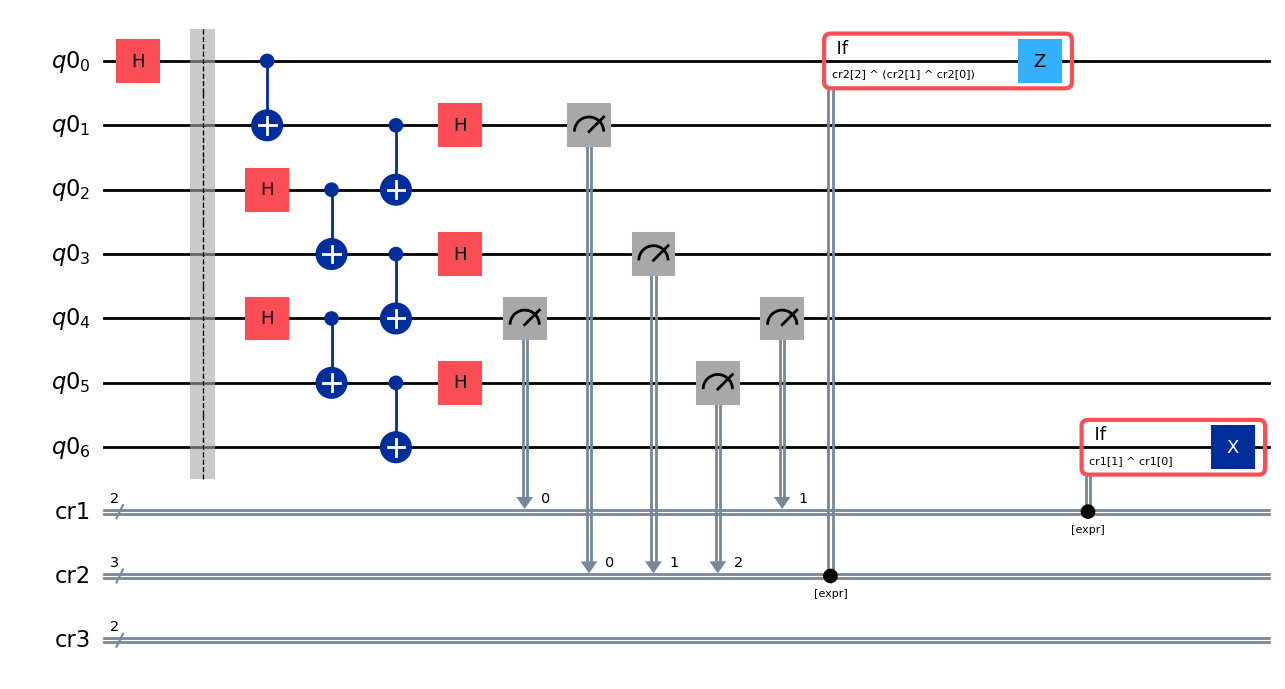

In [6]:
#7 qubitlik kuantum devresi oluşturma ve bu devreyi görselleştirme!
qc=get_dynamic_CNOT_circuit(num_qubit=7)
qc.draw(output='mpl')

In [7]:
# Amaç: Farklı sayıda qubit içeren kuantum devrelerini oluşturmak ve bu devreleri bir listeye eklemek.
# Qubit Sayıları: 7'den başlayarak 41'e kadar ikişer artarak devam eden sayılar.
# Devre Oluşturma: get_dynamic_CNOT_circuit fonksiyonu kullanılarak her bir qubit sayısı için kuantum devresi oluşturulur ve qc_list listesine eklenir.
# Sonuç: qc_list listesinde, her bir eleman belirli bir sayıda qubit içeren bir kuantum devresidir.
# Bu kod, farklı boyutlarda kuantum devreleri oluşturmak ve bu devreleri analiz etmek veya görselleştirmek için kullanılabilir.
max_number_qubit=41

qc_list=[]
#7 den başla 2şer arttırarak 41 e kadar farklı qubitler oluşturma
num_qubit_list=list(range(7,max_number_qubit+1,2))
for num_qubit in num_qubit_list:
    qc_list.append(get_dynamic_CNOT_circuit(num_qubit))
    

In [13]:
#  Qiskit Runtime Service'i kullanarak kuantum devrelerini belirli bir IBM kuantum bilgisayarına (backend) optimize etme.
# from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
# from qiskit_ibm_runtime import QiskitRuntimeService

# backend_name="ibm_cusco"
# service=QiskitRuntimeService()
# backend=service.get_backend(backend_name)
# pm=generate_preset_pass_manager(optimization_level=1,backend=backend)

# qc_transpiled_list=pm.run(qc_list)

Ekstra Bilgiler:
Qiskit Runtime Service: Bu hizmet, IBM Quantum Experience üzerindeki kuantum bilgisayarlara erişim sağlar. 
Kullanıcılar, kuantum devrelerini bu hizmet aracılığıyla çalıştırabilir ve optimize edebilir.

Optimizasyon Seviyesi: Optimizasyon seviyeleri, kuantum devrelerinin belirli bir backend üzerinde daha verimli çalışması için optimize edilme derecesini belirler.
Yüksek seviyeler daha agresif optimizasyonlar uygular.

Transpiling: Transpiling, bir kuantum devresinin belirli bir kuantum donanımına uyumlu hale getirilmesi sürecidir. 
Bu süreçte, devredeki kapılar belirli donanım kısıtlamalarına göre düzenlenir ve optimize edilir.

In [14]:
#backend için kimlik yazdırma
# from qiskit_ibm_runtime import SamplerV2 as sampler

# sampler=sampler(backend=backand)
# job=sampler.run(qc.transpiled_list)
# print(job.job_id)

Ekstra Bilgiler
SamplerV2: SamplerV2, kuantum devrelerini belirli bir backend üzerinde çalıştırmak ve sonuçları örneklemek için kullanılan bir sınıftır.
Job ID: İş kimliği, kuantum devresinin çalıştırılma işinin kimliğini temsil eder. Bu kimlik, işin durumunu izlemek ve sonuçları almak için kullanılır.

In [17]:
#bell durumlarını oluşturma bu olasıkları ve diğer olasılıları qubit sayısına göre görselleştirme
# import matplotlib.pyplot as plt
# from qiskit_ibm_runtime import QiskitRuntimeService

# job_id="djjs"
# service=QiskitRuntimeService()
# job=service.job(job_id)
# result=job.resul()

# list_Bell=[]
# list_Other=[]
#Döngü: qc_list listesindeki her bir kuantum devresi için sonuçları analiz eder.
# for i in range(0,len(qc_list)):
#işin sonuç verilerini alma
#     data=result(i+1).data
#c3 klasik kayıtlarını alma
#     counts=data.cr3.get_counts()
#toplam ölçüm sayısını alma
#     total_counts=data.cr3.num_shots
#bell durumlarının  00-11 olasılılkarını hesaplama
#     prob_Bell=(counts['00']+counts['11'])/total_counts

#     list_Bell.append(prob_Bell)
#     list_Other.append(1-prob_Bell)
#bell ve diğer durumların olasılılarını qubit sayısına göre çizdirme
# plt.plot(num_qubit_list,list_Bell,'-oo',label='00 or 11')
# plt.plot(num_qubit_list,list_Other,'-.',label='other')
# plt.xlabel("number of qubits")
# plt.ylabel("probability")
# plt.legend()


Ekstra Bilgiler
QiskitRuntimeService: Qiskit Runtime Service, IBM Quantum Experience üzerindeki kuantum bilgisayarlara erişim sağlar ve bu bilgisayarlar üzerinde çalıştırılan işleri yönetir.
Bell Durumları: Bell durumları, kuantum bilgi işlemde iki qubit arasında maksimum dolanıklığı temsil eden kuantum durumlarıdır.
 00 ve 11 durumları, Bell durumlarının örnekleridir.
Görselleştirme: Matplotlib kullanılarak, Bell durumlarının ve diğer durumların olasılıkları qubit sayısına göre görselleştirilir.
 Bu, kuantum devrelerinin performansını analiz etmek için yararlıdır.